<a href="https://colab.research.google.com/github/KorhanErkan/TASK_12_ABCDEFG/blob/master/TASK_12_ABCDEFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------------------------------------------

TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.

-----------------------------------------------------------------------------------------------

TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier 
For this task, please use them with their default parameter values and provide the classification report and confusion matrix for each of these.

-----------------------------------------------------------------------------------------------

TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations. 

-----------------------------------------------------------------------------------------------

TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE. 

-----------------------------------------------------------------------------------------------

TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

-----------------------------------------------------------------------------------------------

TASK-12F: Please use the final dataset but this time add the following columns and then run the model with grid search optimization:
SEX
INDEPEND
NPISCORE
FAQ

-----------------------------------------------------------------------------------------------

TASK-12G: Then for comparison purposes, use only these four columns to develop a model):

SEX
INDEPEND
NPISCORE
FAQ

-----------------------------------------------------------------------------------------------

**TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_excel("CDR_6_MRIfull.xlsx")

In [ ]:
#PCA
from sklearn.decomposition import PCA
X = data.iloc[:,15:]
pca = PCA(2) 
projected = pca.fit_transform(X)

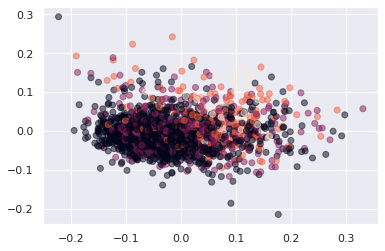

In [ ]:
y = data["MEMORY"]
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=y)

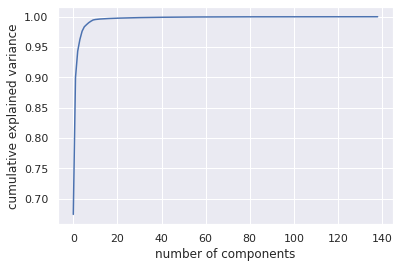

In [ ]:
pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

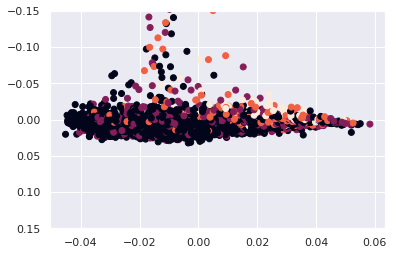

In [ ]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=y)
ax.set_ylim(0.15, -0.15);

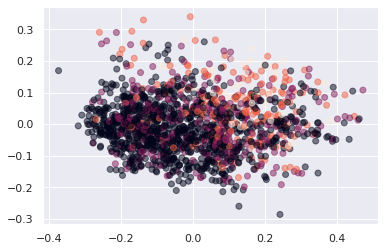

In [ ]:
#ISOMAP
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
fit = model.fit_transform(X)
plt.scatter(fit[:, 0], fit[:, 1], alpha=0.5, c=y)

**TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import LocallyLinearEmbedding, TSNE

In [ ]:
# PCA
pca = PCA(n_components=7)
fit_data = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data['CDRGLOB'], test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for PCA:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for PCA:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for PCA:",accuracy_score(y_test, y_pred))

GNB Accuracy for PCA: 0.6525
SVM Accuracy for PCA: 0.6625
RFC Accuracy for PCA: 0.665


In [ ]:
# LLE
lle = LocallyLinearEmbedding(n_components=7, n_neighbors=10)
fit_data = lle.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data['CDRGLOB'], test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for LLE:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for LLE:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for LLE:",accuracy_score(y_test, y_pred))

GNB Accuracy for LLE: 0.4675
SVM Accuracy for LLE: 0.655
RFC Accuracy for LLE: 0.56


In [ ]:
# ISOMAP
iso = Isomap(n_components=7)
fit_data = iso.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data['CDRGLOB'], test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB-ISOMAP SCORE:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM-ISOMAP SCORE:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC-ISOMAP SCORE:",accuracy_score(y_test, y_pred))

GNB-ISOMAP SCORE: 0.61
SVM-ISOMAP SCORE: 0.65
RFC-ISOMAP SCORE: 0.6275


**TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [ ]:
Y=data.iloc[:,15:]

In [ ]:
pca = PCA(n_components=5)
X_slc_pca = pca.fit_transform(Y)
scaler1 = MinMaxScaler()
scaler1.fit(X_slc_pca)
X_slc_pca = scaler1.transform(X_slc_pca)

In [ ]:
lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10, method='modified',eigen_solver='dense')
Y_lle = lle.fit_transform(Y)
scaler2 = MinMaxScaler()
scaler2.fit(Y_lle)
Y_lle = scaler2.transform(Y_lle)

In [ ]:
Iso = Isomap(n_components=5)
X_slc_ıso = Iso.fit_transform(Y)
scaler3 = MinMaxScaler()
scaler3.fit(X_slc_ıso)
X_slc_ıso = scaler3.transform(X_slc_ıso)

In [ ]:
tsne = TSNE(n_components=3, init='random', random_state=0)
X_slc_tsne = tsne.fit_transform(Y)
scaler4 = MinMaxScaler()
scaler4.fit(X_slc_tsne)
X_slc_tsne = scaler4.transform(X_slc_tsne)

In [ ]:
arr = np.concatenate((X_slc_pca[:,:5], Y_lle[:,:5], X_slc_ıso[:,:5], X_slc_tsne), axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier
param_grid = [{
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[2, 3, 4],
    "max_depth": [10, 20, 30]
}]

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.645


TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE.

In [ ]:
data2 = pd.read_excel("CDR_6_MRI_selected.xlsx")

In [ ]:
Y=data2.iloc[:,15:]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
scaler5 = MinMaxScaler()
fit= scaler5.fit_transform(Y)

kmeans = KMeans(n_clusters=4)
kmeans.fit(fit)
y_kmeans = kmeans.predict(fit)

tsne = TSNE(n_components=2)
fitted_data = tsne.fit_transform(fit)


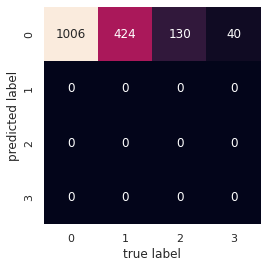

In [ ]:
labels = np.zeros_like(y_kmeans)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data2["CDRGLOB"], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means.**

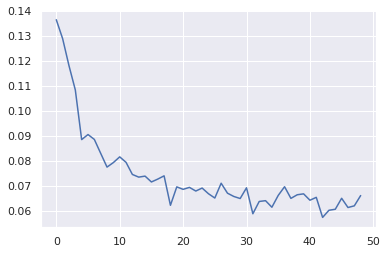

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
list_SS = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(fit)

    silhouette_avg = silhouette_score(fit, cluster_labels)
    list_SS.append(silhouette_avg)
plt.plot(list_SS)

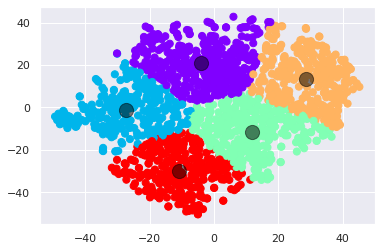

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(fitted_data)
y_kmeans = kmeans.predict(fitted_data)
    
plt.scatter(fitted_data[:, 0], fitted_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

**TASK-12F: Please use the final dataset but this time add the following columns and then run the model with grid search optimization: SEX INDEPEND NPISCORE FAQ**

In [ ]:
data3 = data2[['SEX', 'INDEPEND', 'NPISCORE', 'FAQ']]

In [ ]:
data4 = np.concatenate((arr, data3), axis = 1)

In [ ]:
dfx = pd.DataFrame(data4)

In [ ]:
dfx.shape

(1600, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfx, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier
param_grid = [{
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[2, 3, 4],
    "max_depth": [10, 20, 30]
}]

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.765


 **TASK-12G: Then for comparison purposes, use only these four columns to develop a model):**

**SEX INDEPEND NPISCORE FAQ**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier
param_grid = [{
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[2, 3, 4],
    "max_depth": [10, 20, 30]
}]

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.7725
